# Dimensionality Reduction Techniques Visualization

This notebook demonstrates various dimensionality reduction techniques and creates visualizations including density distribution plots for each technique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from dim_reduction_utils import DimensionalityReduction, EvaluationMetrics

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Seed for reproducibility
np.random.seed(42)

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Number of classes: 2
Class distribution: [212 357]


In [3]:
# Function to plot density distributions
def plot_density_distribution(X_reduced, y, title):
    plt.figure(figsize=(15, 6))
    
    # First component density
    plt.subplot(1, 2, 1)
    for i, label in enumerate(np.unique(y)):
        sns.kdeplot(X_reduced[y == i, 0], label=f'Class {i}', fill=True, alpha=0.3)
    plt.title(f'{title} - Component 1 Density')
    plt.xlabel('Component 1')
    plt.ylabel('Density')
    plt.legend()
    
    # Second component density (if available)
    if X_reduced.shape[1] > 1:
        plt.subplot(1, 2, 2)
        for i, label in enumerate(np.unique(y)):
            sns.kdeplot(X_reduced[y == i, 1], label=f'Class {i}', fill=True, alpha=0.3)
        plt.title(f'{title} - Component 2 Density')
        plt.xlabel('Component 2')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Initialize dimensionality reduction and evaluation
dr = DimensionalityReduction(n_components=2, random_state=42)
metrics = EvaluationMetrics(k=5)

## 1. Principal Component Analysis (PCA)

PCA Metrics:
Trustworthiness: 0.8998
Continuity: 0.7694
KNN Accuracy: 0.9737
Silhouette Score: 0.4377


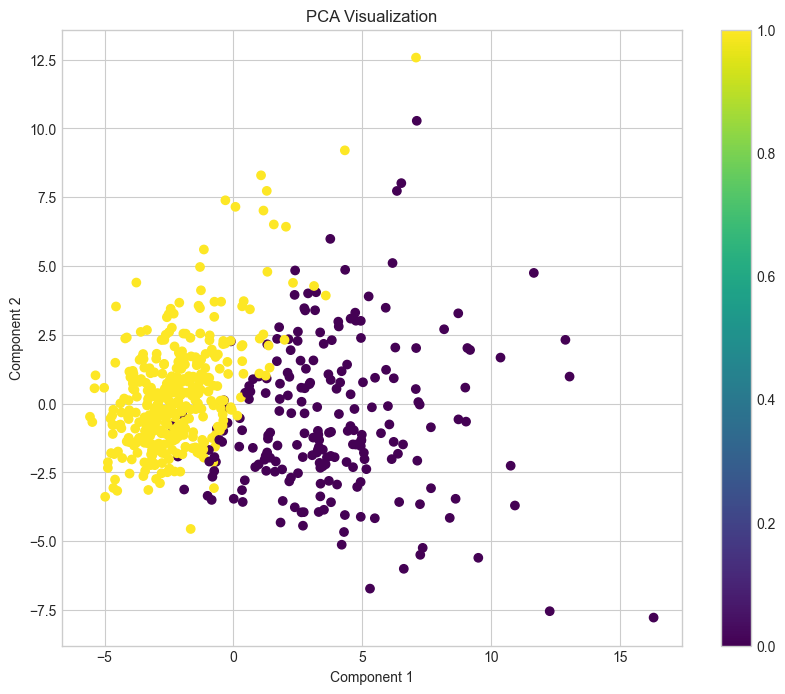

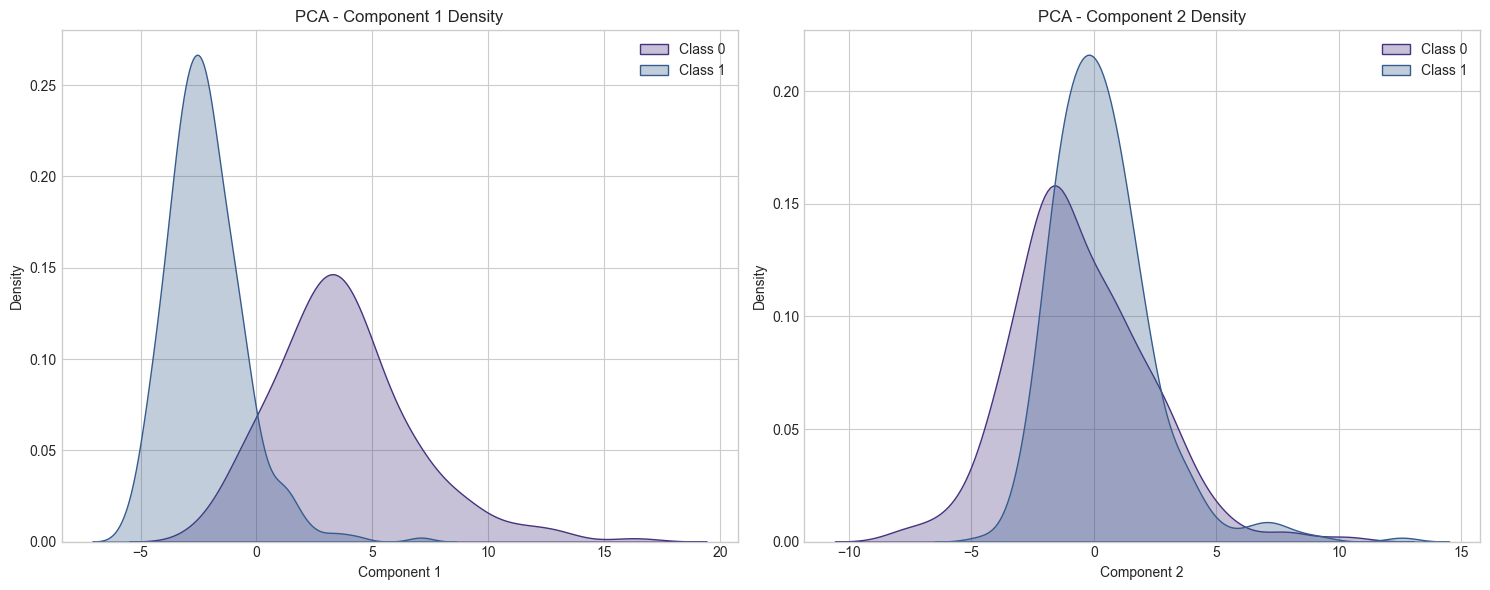

In [4]:
# Apply PCA
X_pca = dr.pca(X)

# Evaluate PCA
trust_pca = metrics.trustworthiness(X, X_pca)
cont_pca = metrics.continuity(X, X_pca)
knn_acc_pca = metrics.knn_accuracy(X_pca, y)
sil_score_pca = metrics.silhouette_score(X_pca, y)

print(f"PCA Metrics:")
print(f"Trustworthiness: {trust_pca:.4f}")
print(f"Continuity: {cont_pca:.4f}")
print(f"KNN Accuracy: {knn_acc_pca:.4f}")
print(f"Silhouette Score: {sil_score_pca:.4f}")

# Visualize PCA results
metrics.visualize(X_pca, y, title="PCA Visualization")

# Plot density distribution
plot_density_distribution(X_pca, y, "PCA")

## 2. Linear Discriminant Analysis (LDA)

LDA Metrics:
Trustworthiness: 0.7149
Continuity: 0.7825
KNN Accuracy: 0.9737
Silhouette Score: 0.6776


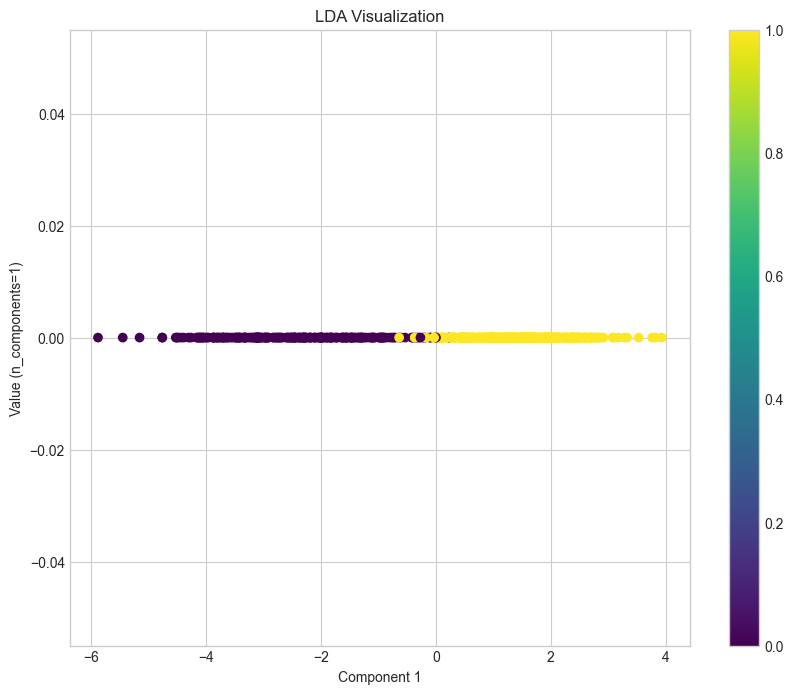

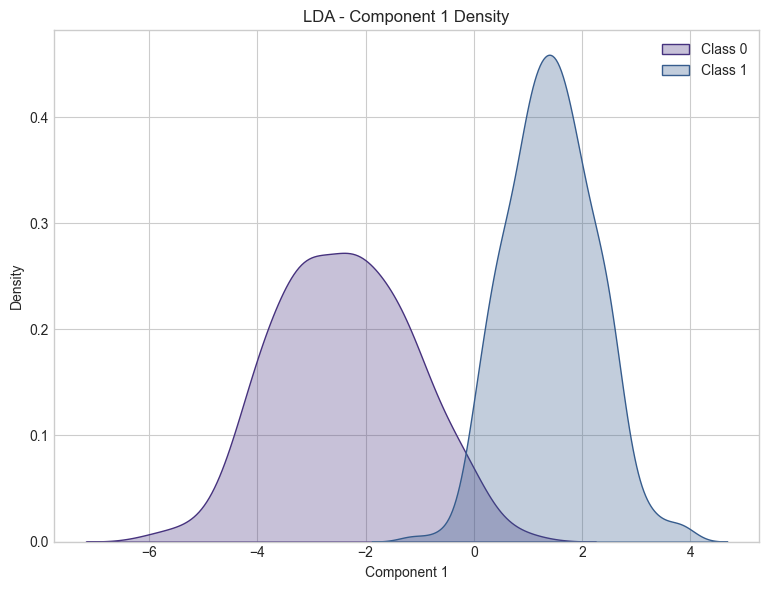

In [15]:
# Apply LDA
dr_lda = DimensionalityReduction(n_components=1, random_state=42)
X_lda = dr_lda.lda(X, y)

# Evaluate LDA
trust_lda = metrics.trustworthiness(X, X_lda)
cont_lda = metrics.continuity(X, X_lda)
knn_acc_lda = metrics.knn_accuracy(X_lda, y)
sil_score_lda = metrics.silhouette_score(X_lda, y)

print(f"LDA Metrics:")
print(f"Trustworthiness: {trust_lda:.4f}")
print(f"Continuity: {cont_lda:.4f}")
print(f"KNN Accuracy: {knn_acc_lda:.4f}")
print(f"Silhouette Score: {sil_score_lda:.4f}")

# Visualize LDA results
metrics.visualize(X_lda, y, title="LDA Visualization")

# Plot density distribution
plot_density_distribution(X_lda, y, "LDA")

## 3. t-Distributed Stochastic Neighbor Embedding (t-SNE)

c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib

t-SNE Metrics:
Trustworthiness: 0.8322
Continuity: 0.7564
KNN Accuracy: 0.9474
Silhouette Score: 0.4884


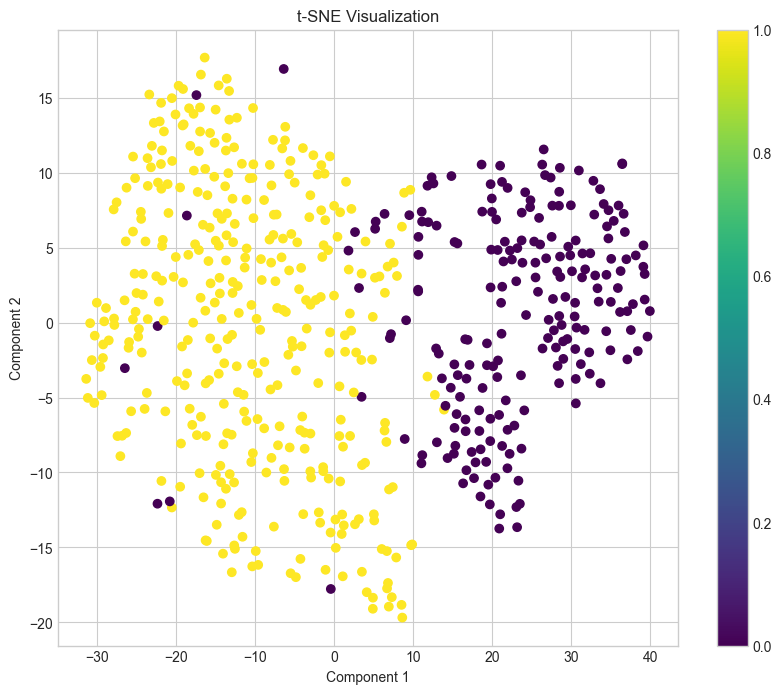

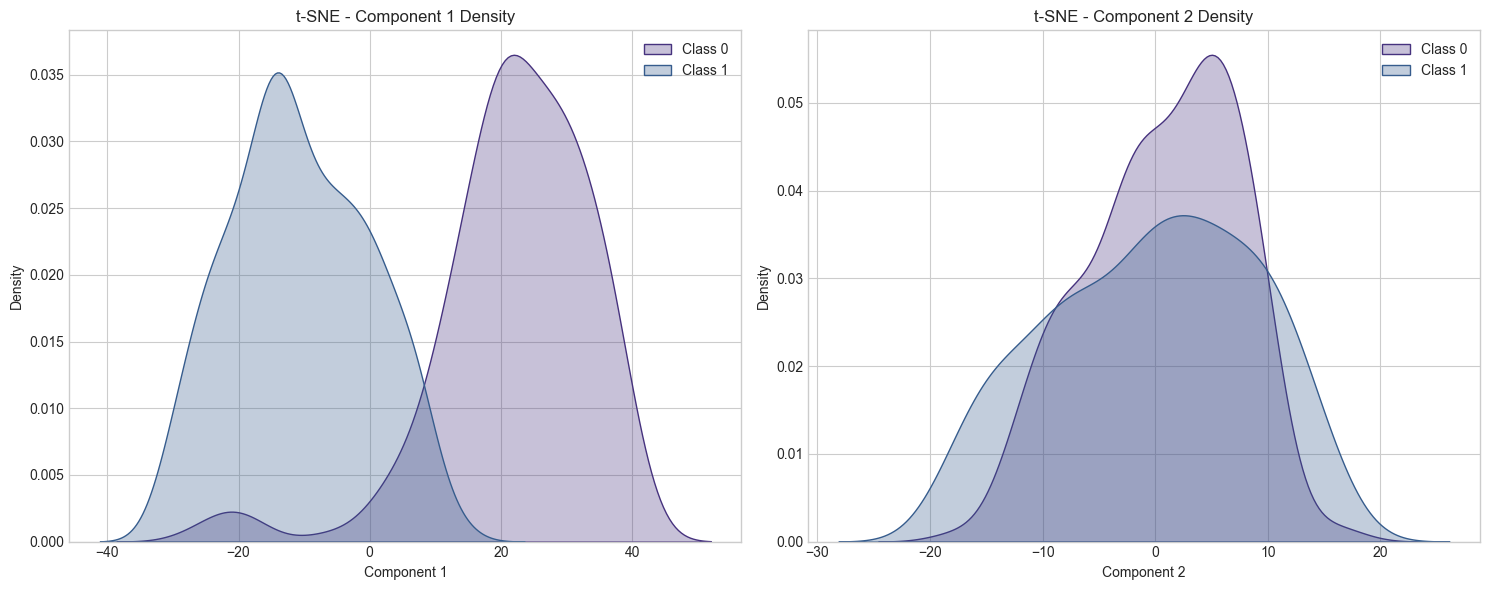

In [6]:
# Apply t-SNE
X_tsne = dr.tsne(X, perplexity=30)

# Evaluate t-SNE
trust_tsne = metrics.trustworthiness(X, X_tsne)
cont_tsne = metrics.continuity(X, X_tsne)
knn_acc_tsne = metrics.knn_accuracy(X_tsne, y)
sil_score_tsne = metrics.silhouette_score(X_tsne, y)

print(f"t-SNE Metrics:")
print(f"Trustworthiness: {trust_tsne:.4f}")
print(f"Continuity: {cont_tsne:.4f}")
print(f"KNN Accuracy: {knn_acc_tsne:.4f}")
print(f"Silhouette Score: {sil_score_tsne:.4f}")

# Visualize t-SNE results
metrics.visualize(X_tsne, y, title="t-SNE Visualization")

# Plot density distribution
plot_density_distribution(X_tsne, y, "t-SNE")

## 4. Multidimensional Scaling (MDS)

MDS Metrics:
Trustworthiness: 0.8533
Continuity: 0.7615
KNN Accuracy: 0.9649
Silhouette Score: 0.3941


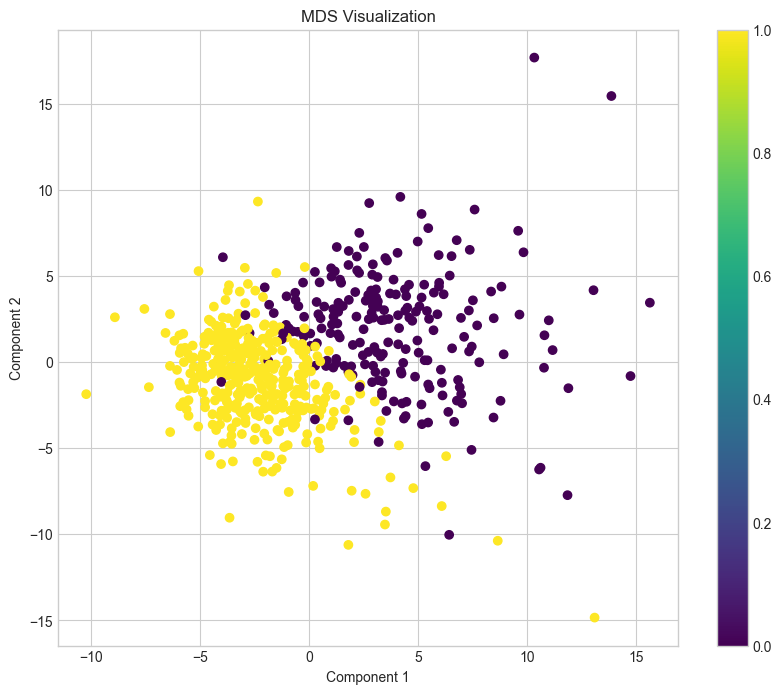

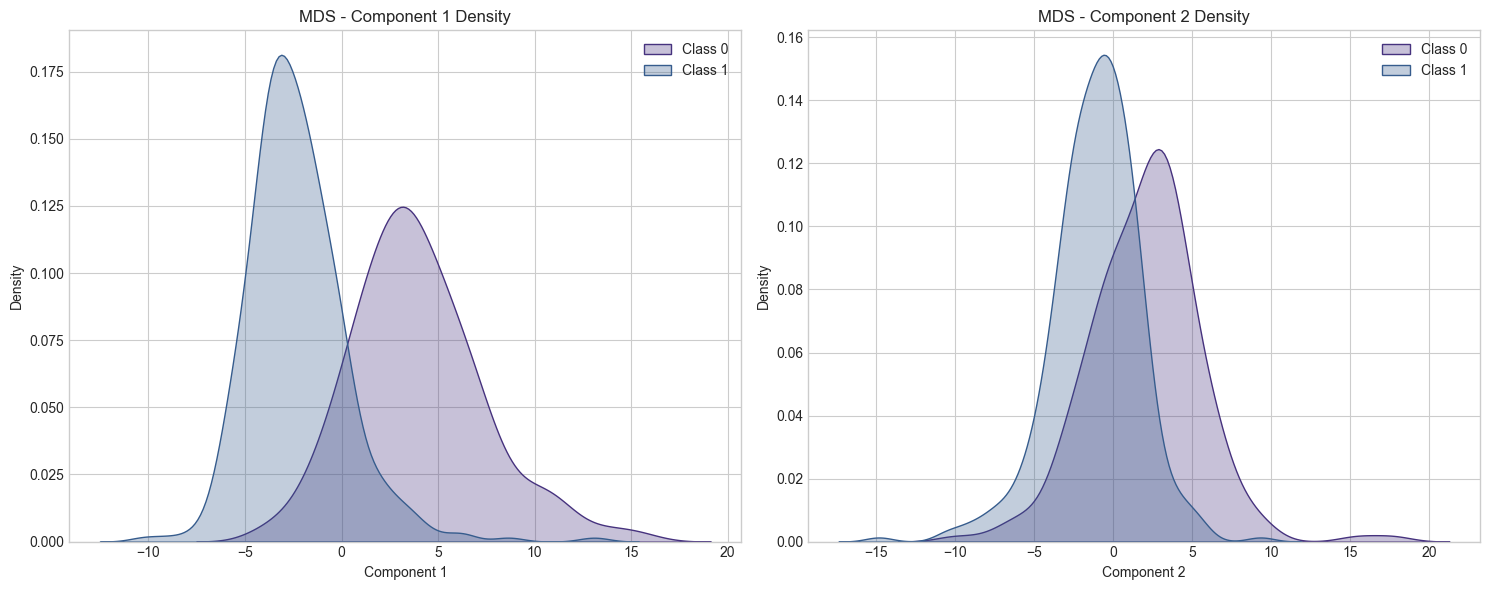

In [7]:
# Apply MDS
X_mds = dr.mds(X)

# Evaluate MDS
trust_mds = metrics.trustworthiness(X, X_mds)
cont_mds = metrics.continuity(X, X_mds)
knn_acc_mds = metrics.knn_accuracy(X_mds, y)
sil_score_mds = metrics.silhouette_score(X_mds, y)

print(f"MDS Metrics:")
print(f"Trustworthiness: {trust_mds:.4f}")
print(f"Continuity: {cont_mds:.4f}")
print(f"KNN Accuracy: {knn_acc_mds:.4f}")
print(f"Silhouette Score: {sil_score_mds:.4f}")

# Visualize MDS results
metrics.visualize(X_mds, y, title="MDS Visualization")

# Plot density distribution
plot_density_distribution(X_mds, y, "MDS")

## 5. Isomap

Isomap Metrics:
Trustworthiness: 0.8199
Continuity: 0.7588
KNN Accuracy: 0.9649
Silhouette Score: 0.4906


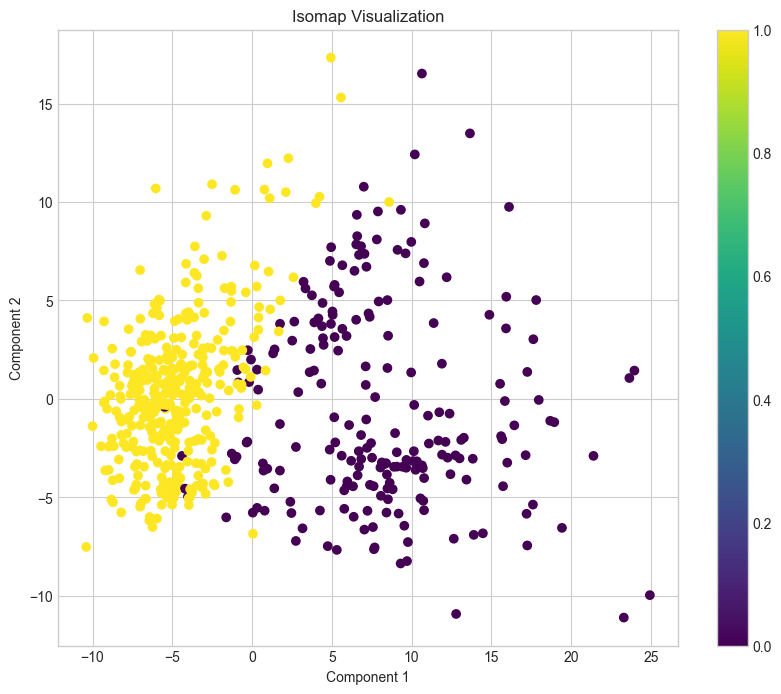

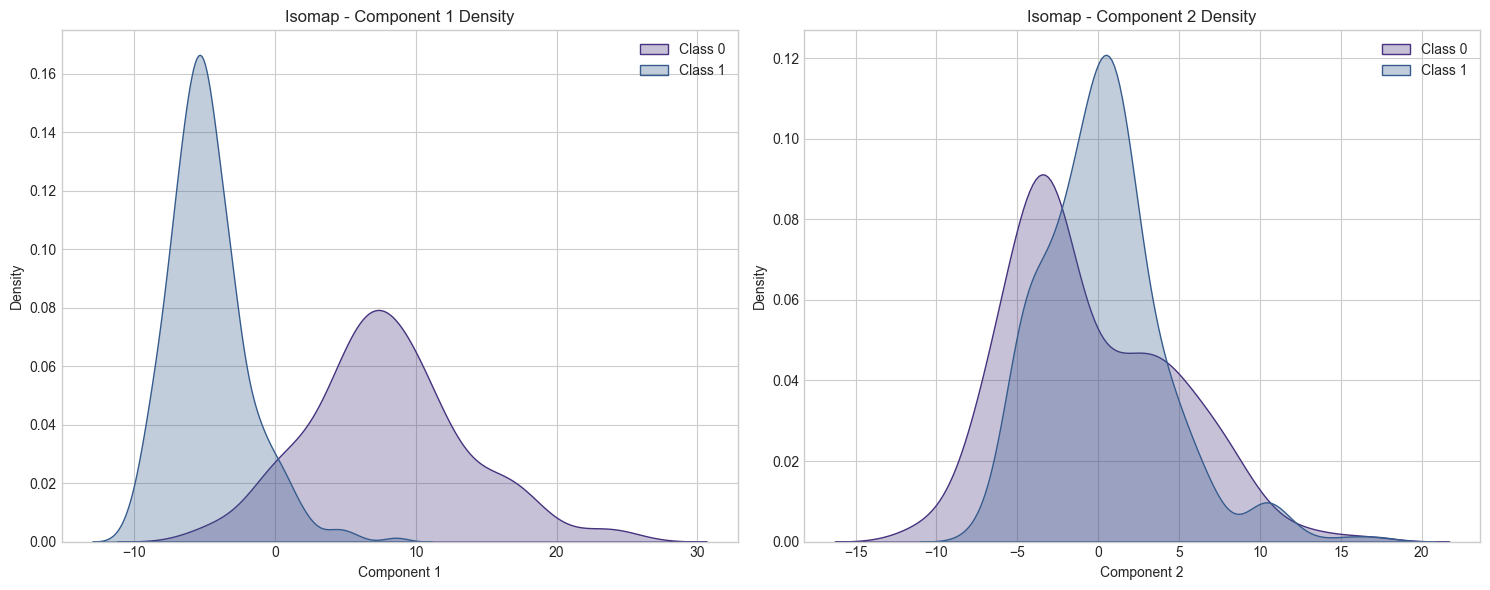

In [8]:
# Apply Isomap
X_isomap = dr.isomap(X, n_neighbors=5)

# Evaluate Isomap
trust_isomap = metrics.trustworthiness(X, X_isomap)
cont_isomap = metrics.continuity(X, X_isomap)
knn_acc_isomap = metrics.knn_accuracy(X_isomap, y)
sil_score_isomap = metrics.silhouette_score(X_isomap, y)

print(f"Isomap Metrics:")
print(f"Trustworthiness: {trust_isomap:.4f}")
print(f"Continuity: {cont_isomap:.4f}")
print(f"KNN Accuracy: {knn_acc_isomap:.4f}")
print(f"Silhouette Score: {sil_score_isomap:.4f}")

# Visualize Isomap results
metrics.visualize(X_isomap, y, title="Isomap Visualization")

# Plot density distribution
plot_density_distribution(X_isomap, y, "Isomap")

## 6. Independent Component Analysis (ICA)

ICA Metrics:
Trustworthiness: 0.8995
Continuity: 0.7577
KNN Accuracy: 0.9649
Silhouette Score: 0.3737


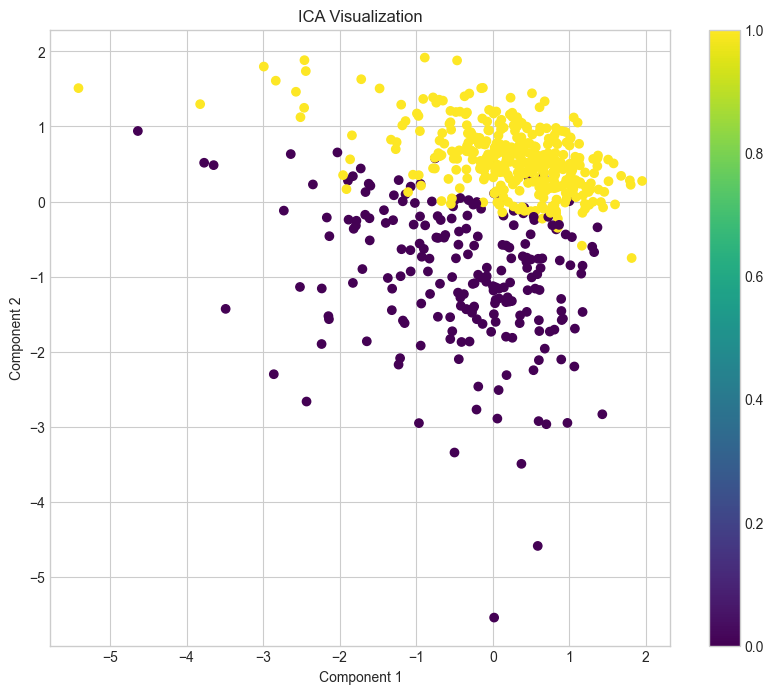

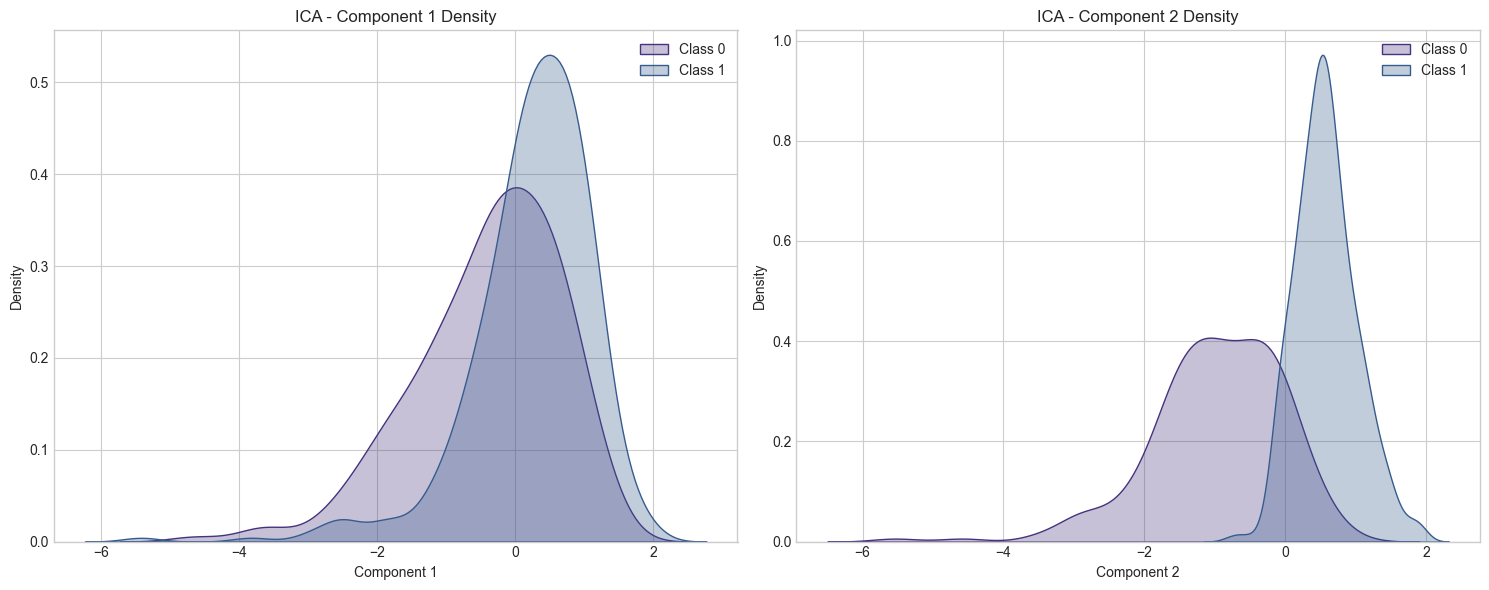

In [9]:
# Apply ICA
X_ica = dr.ica(X)

# Evaluate ICA
trust_ica = metrics.trustworthiness(X, X_ica)
cont_ica = metrics.continuity(X, X_ica)
knn_acc_ica = metrics.knn_accuracy(X_ica, y)
sil_score_ica = metrics.silhouette_score(X_ica, y)

print(f"ICA Metrics:")
print(f"Trustworthiness: {trust_ica:.4f}")
print(f"Continuity: {cont_ica:.4f}")
print(f"KNN Accuracy: {knn_acc_ica:.4f}")
print(f"Silhouette Score: {sil_score_ica:.4f}")

# Visualize ICA results
metrics.visualize(X_ica, y, title="ICA Visualization")

# Plot density distribution
plot_density_distribution(X_ica, y, "ICA")

## 7. Self-Organizing Maps (SOM)

SOM Metrics:
Trustworthiness: 0.8004
Continuity: 0.6762
KNN Accuracy: 0.9386
Silhouette Score: 0.4064


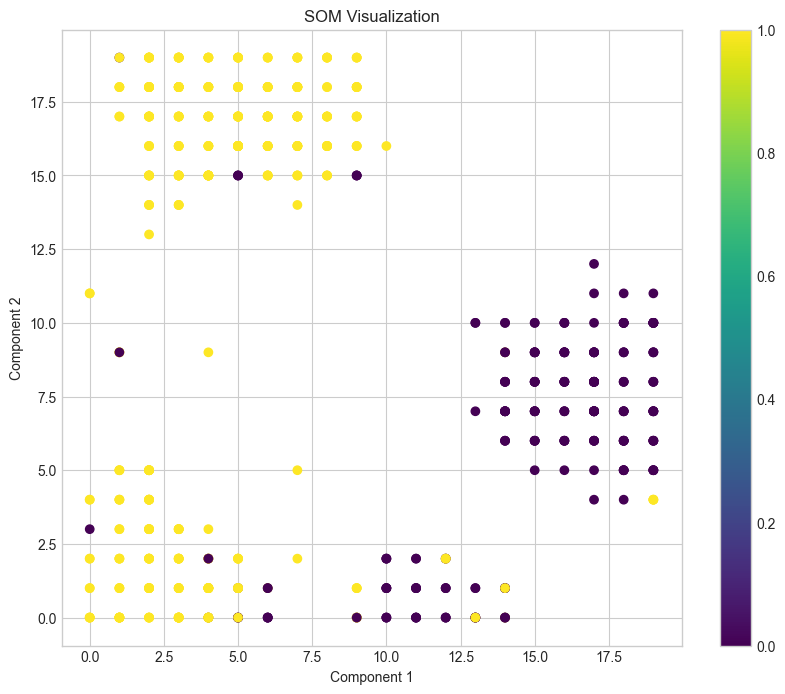

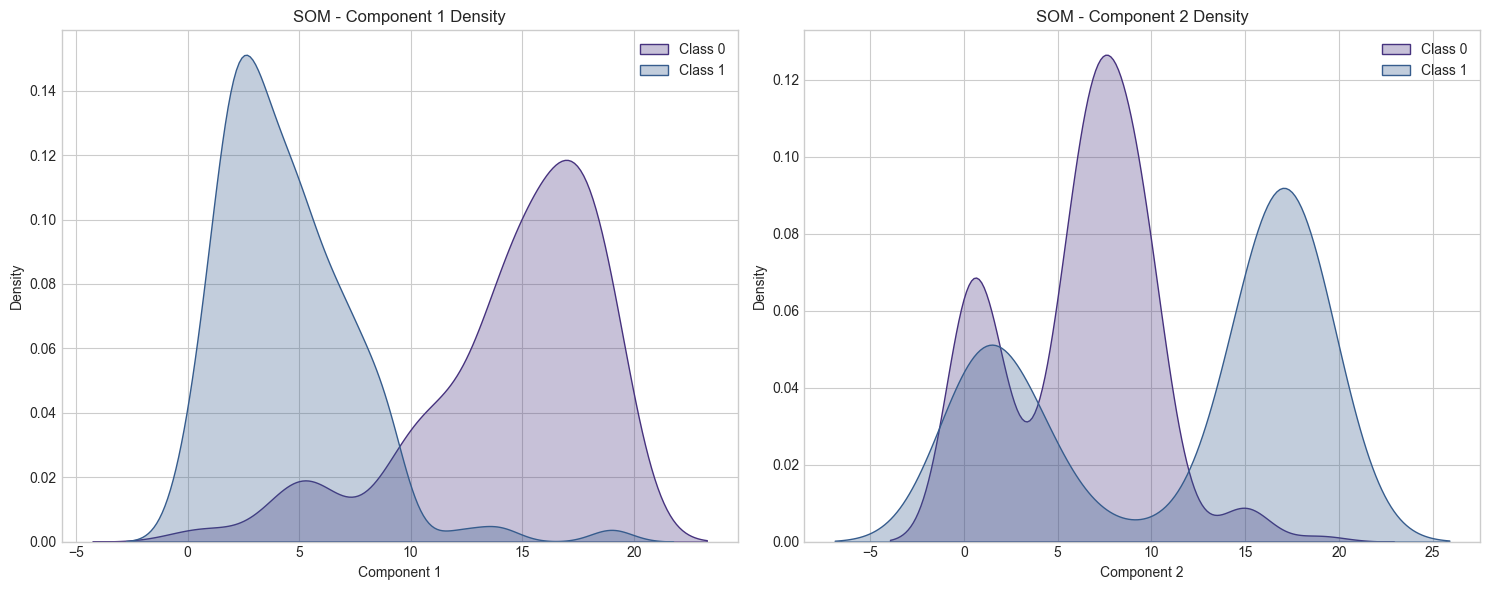

In [10]:
# Apply SOM
X_som = dr.som(X, grid_size=(20, 20))

# Evaluate SOM
trust_som = metrics.trustworthiness(X, X_som)
cont_som = metrics.continuity(X, X_som)
knn_acc_som = metrics.knn_accuracy(X_som, y)
sil_score_som = metrics.silhouette_score(X_som, y)

print(f"SOM Metrics:")
print(f"Trustworthiness: {trust_som:.4f}")
print(f"Continuity: {cont_som:.4f}")
print(f"KNN Accuracy: {knn_acc_som:.4f}")
print(f"Silhouette Score: {sil_score_som:.4f}")

# Visualize SOM results
metrics.visualize(X_som, y, title="SOM Visualization")

# Plot density distribution
plot_density_distribution(X_som, y, "SOM")

## 8. Genetic Algorithm PCA (GA-PCA)

GA-PCA Metrics:
Trustworthiness: 0.9024
Continuity: 0.7828
KNN Accuracy: 0.9825
Silhouette Score: 0.4515


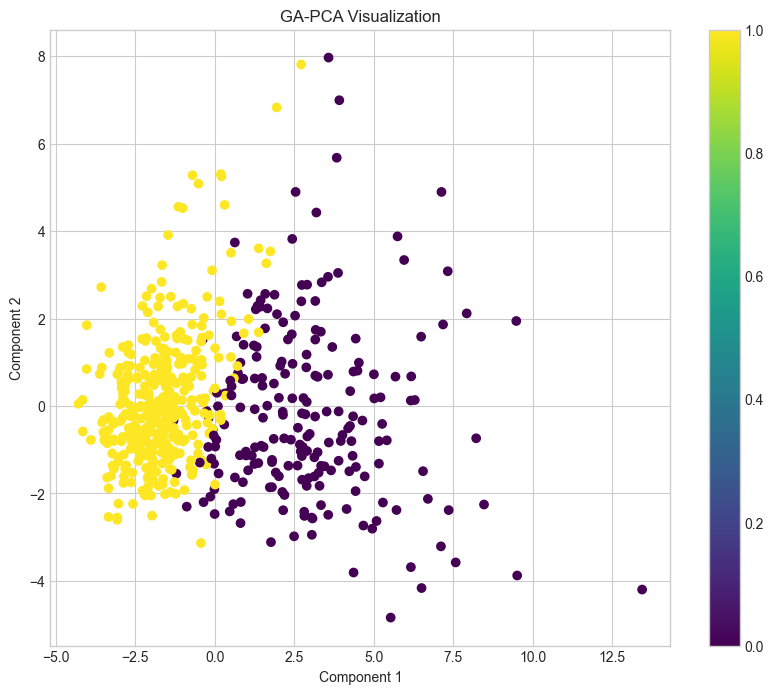

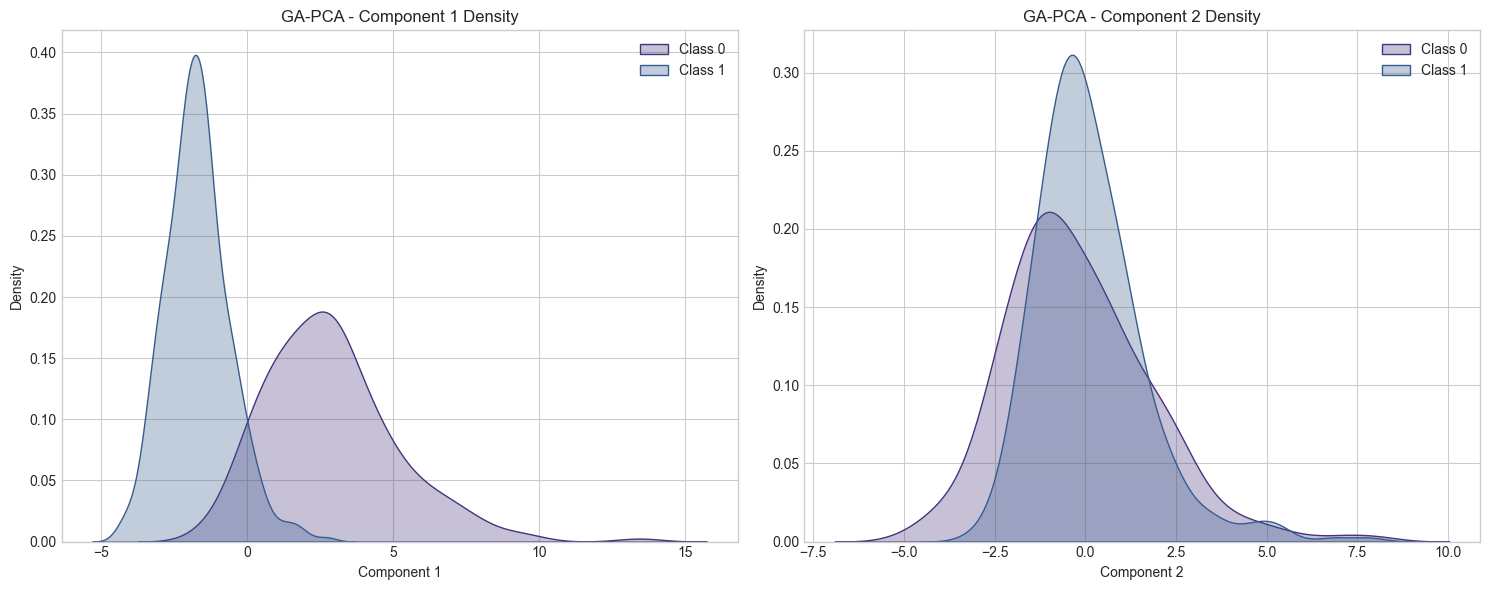

In [11]:
# Apply GA-PCA (with smaller parameters for demo)
X_ga_pca = dr.ga_pca(X, y, population_size=20, generations=20, mutation_rate=0.1)

# Evaluate GA-PCA
trust_ga_pca = metrics.trustworthiness(X, X_ga_pca)
cont_ga_pca = metrics.continuity(X, X_ga_pca)
knn_acc_ga_pca = metrics.knn_accuracy(X_ga_pca, y)
sil_score_ga_pca = metrics.silhouette_score(X_ga_pca, y)

print(f"GA-PCA Metrics:")
print(f"Trustworthiness: {trust_ga_pca:.4f}")
print(f"Continuity: {cont_ga_pca:.4f}")
print(f"KNN Accuracy: {knn_acc_ga_pca:.4f}")
print(f"Silhouette Score: {sil_score_ga_pca:.4f}")

# Visualize GA-PCA results
metrics.visualize(X_ga_pca, y, title="GA-PCA Visualization")

# Plot density distribution
plot_density_distribution(X_ga_pca, y, "GA-PCA")

## 9. Artificial Bee Colony Projection (ABC)

ABC Metrics:
Trustworthiness: 0.7329
Continuity: 0.7324
KNN Accuracy: 0.9825
Silhouette Score: 0.5156


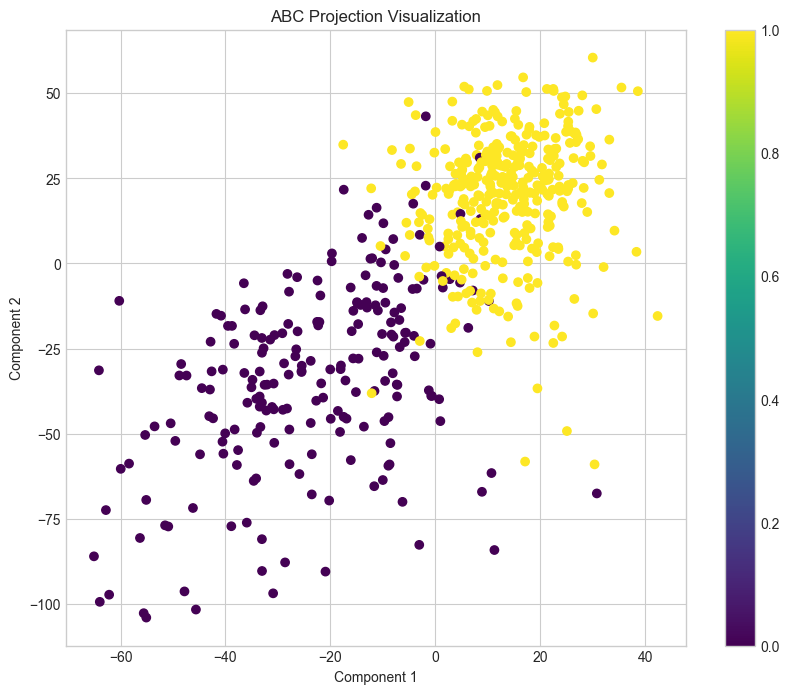

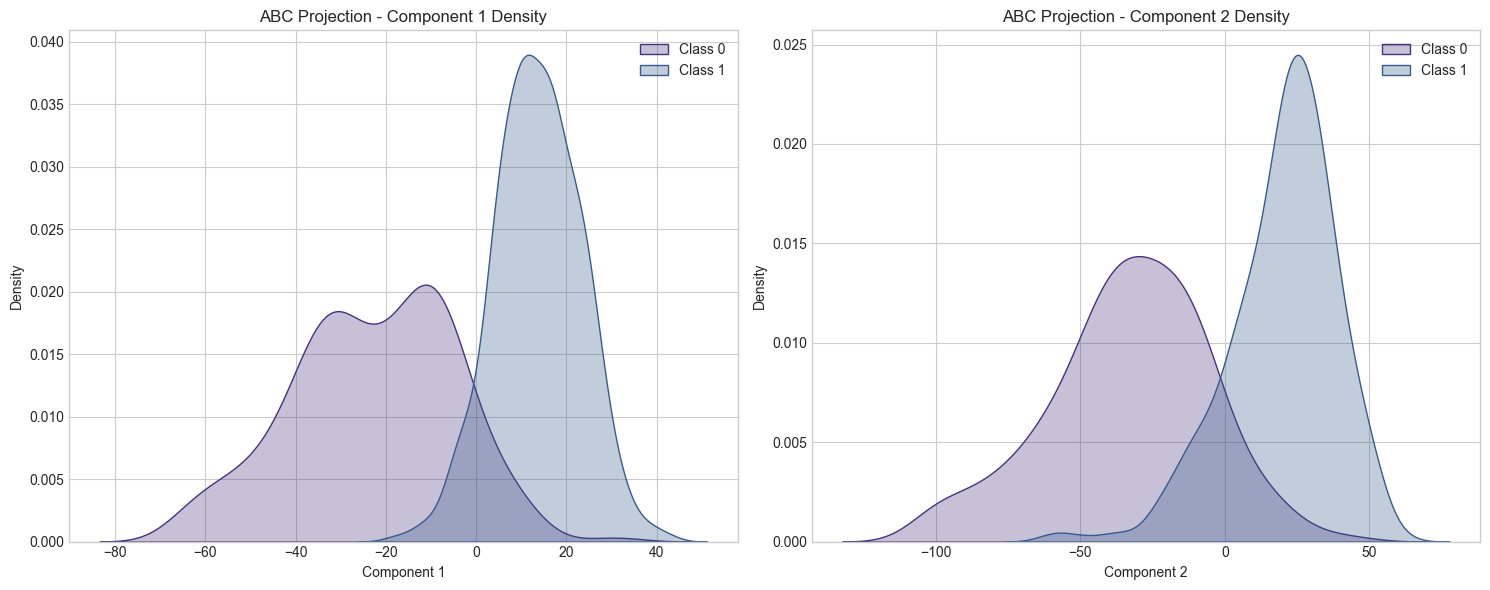

In [12]:
# Apply ABC (with smaller parameters for demo)
X_abc = dr.abc_projection(X, y, n_bees=20, n_iterations=20, limit=5)

# Evaluate ABC
trust_abc = metrics.trustworthiness(X, X_abc)
cont_abc = metrics.continuity(X, X_abc)
knn_acc_abc = metrics.knn_accuracy(X_abc, y)
sil_score_abc = metrics.silhouette_score(X_abc, y)

print(f"ABC Metrics:")
print(f"Trustworthiness: {trust_abc:.4f}")
print(f"Continuity: {cont_abc:.4f}")
print(f"KNN Accuracy: {knn_acc_abc:.4f}")
print(f"Silhouette Score: {sil_score_abc:.4f}")

# Visualize ABC results
metrics.visualize(X_abc, y, title="ABC Projection Visualization")

# Plot density distribution
plot_density_distribution(X_abc, y, "ABC Projection")

## 10. Ant Colony Optimization (ACO) Feature Selection

ACO Metrics:
Trustworthiness: 0.8319
Continuity: 0.7515
KNN Accuracy: 0.9912
Silhouette Score: 0.4550


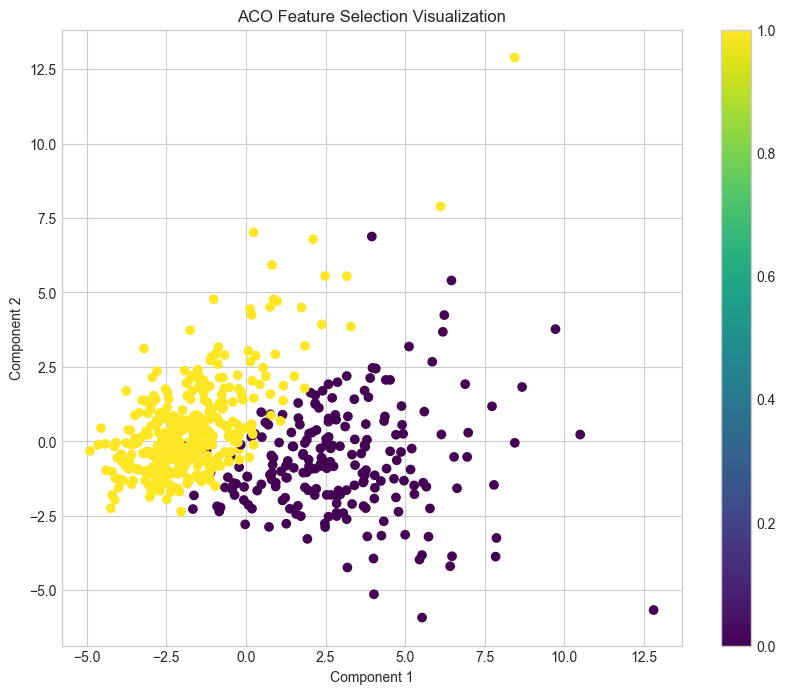

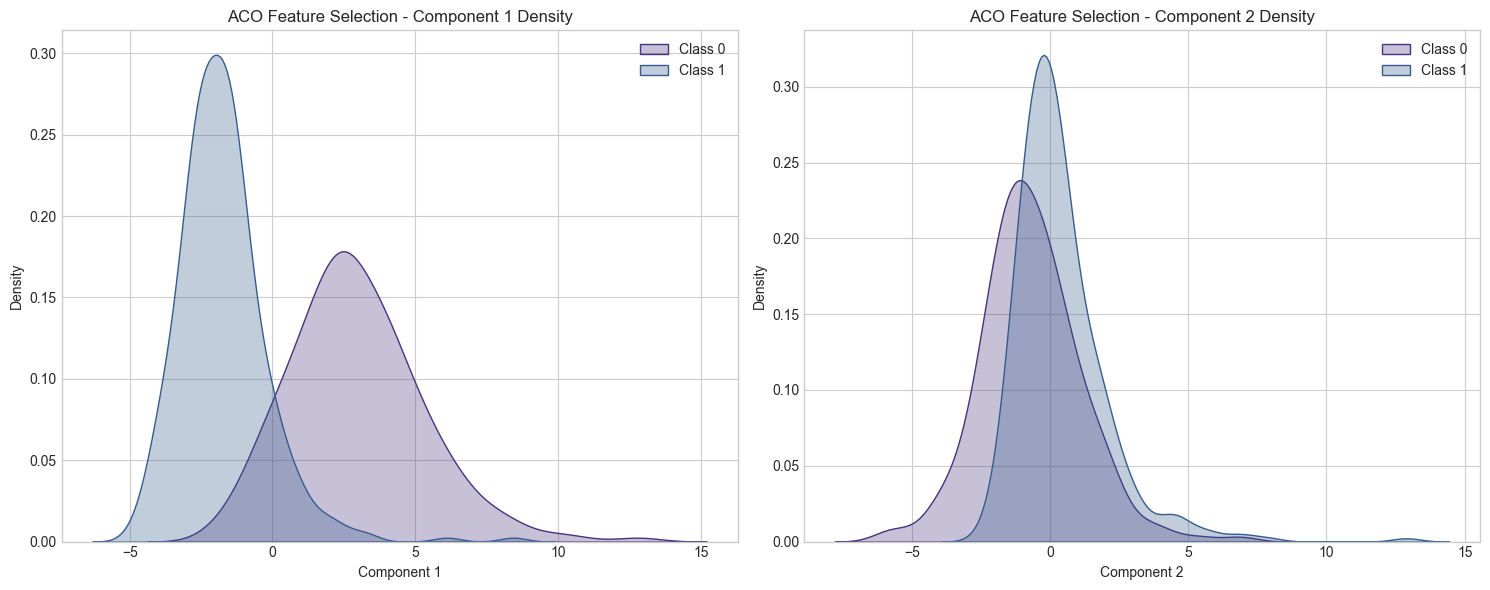

In [13]:
# Apply ACO (with smaller parameters for demo)
X_aco = dr.aco_feature_selection(X, y, n_ants=20, n_iterations=20, alpha=1, beta=2, rho=0.1)

# Evaluate ACO
trust_aco = metrics.trustworthiness(X, X_aco)
cont_aco = metrics.continuity(X, X_aco)
knn_acc_aco = metrics.knn_accuracy(X_aco, y)
sil_score_aco = metrics.silhouette_score(X_aco, y)

print(f"ACO Metrics:")
print(f"Trustworthiness: {trust_aco:.4f}")
print(f"Continuity: {cont_aco:.4f}")
print(f"KNN Accuracy: {knn_acc_aco:.4f}")
print(f"Silhouette Score: {sil_score_aco:.4f}")

# Visualize ACO results
metrics.visualize(X_aco, y, title="ACO Feature Selection Visualization")

# Plot density distribution
plot_density_distribution(X_aco, y, "ACO Feature Selection")

## 11. Particle Swarm Optimization (PSO) Projection

PSO Metrics:
Trustworthiness: 0.7889
Continuity: 0.7834
KNN Accuracy: 0.9912
Silhouette Score: 0.5724


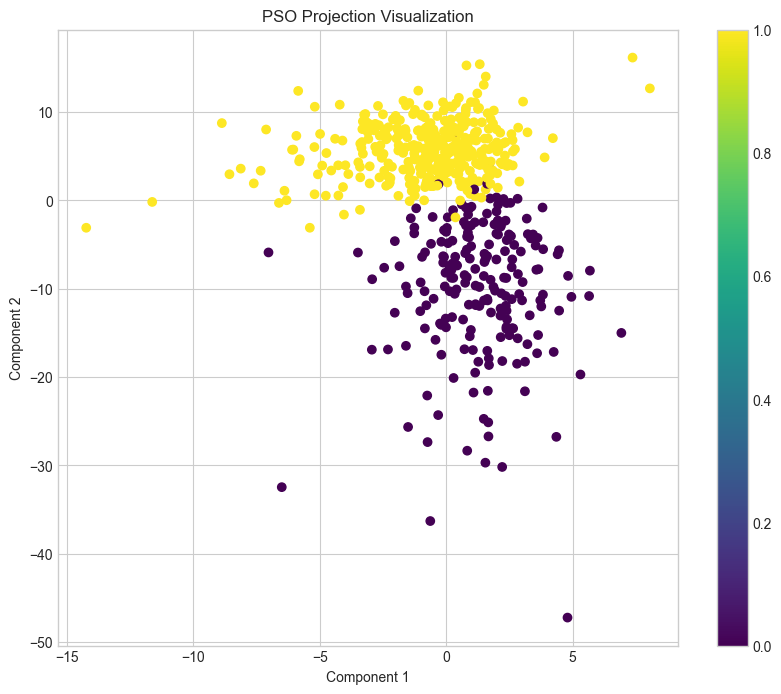

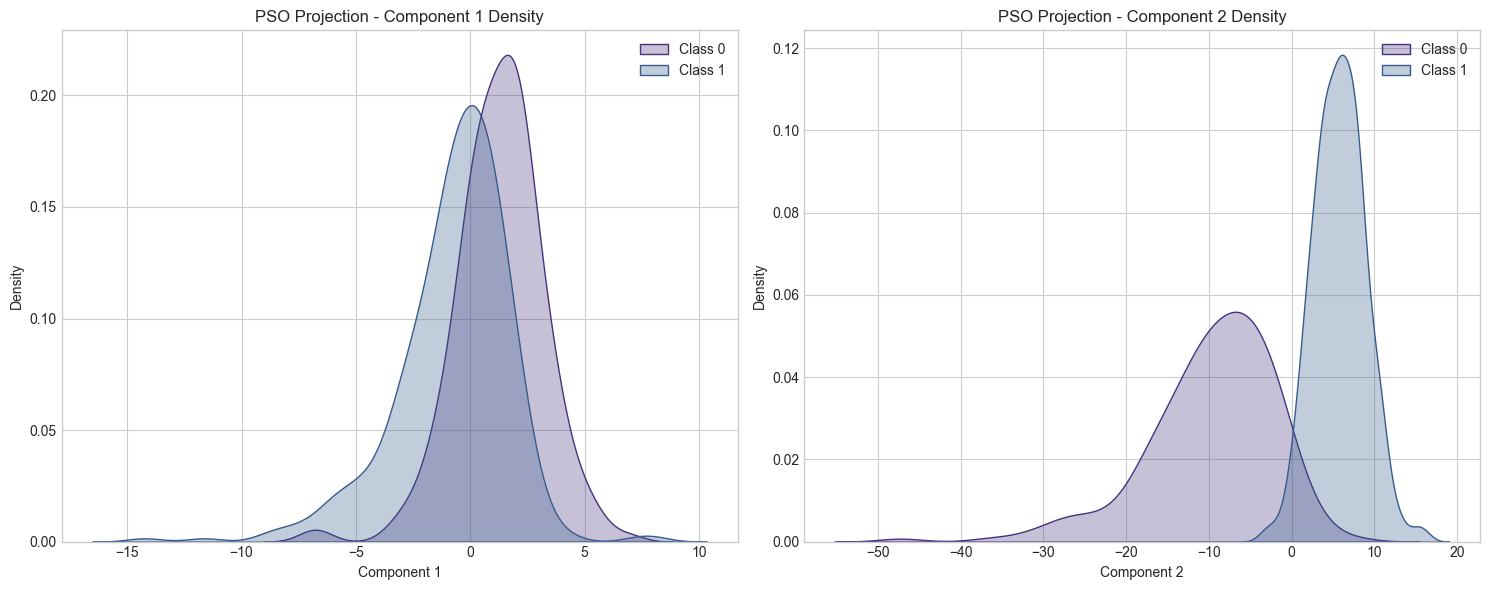

In [14]:
# Apply PSO (with smaller parameters for demo)
X_pso = dr.pso_projection(X, y, n_particles=20, n_iterations=20, w=0.7, c1=1.5, c2=1.5)

# Evaluate PSO
trust_pso = metrics.trustworthiness(X, X_pso)
cont_pso = metrics.continuity(X, X_pso)
knn_acc_pso = metrics.knn_accuracy(X_pso, y)
sil_score_pso = metrics.silhouette_score(X_pso, y)

print(f"PSO Metrics:")
print(f"Trustworthiness: {trust_pso:.4f}")
print(f"Continuity: {cont_pso:.4f}")
print(f"KNN Accuracy: {knn_acc_pso:.4f}")
print(f"Silhouette Score: {sil_score_pso:.4f}")

# Visualize PSO results
metrics.visualize(X_pso, y, title="PSO Projection Visualization")

# Plot density distribution
plot_density_distribution(X_pso, y, "PSO Projection")

## Comparison of All Techniques

In [16]:
# Collect all metrics
techniques = ['PCA', 'LDA', 't-SNE', 'MDS', 'Isomap', 'ICA', 'SOM', 'GA-PCA', 'ABC', 'ACO', 'PSO']
trustworthiness = [trust_pca, trust_lda, trust_tsne, trust_mds, trust_isomap, trust_ica, 
                  trust_som, trust_ga_pca, trust_abc, trust_aco, trust_pso]
continuity = [cont_pca, cont_lda, cont_tsne, cont_mds, cont_isomap, cont_ica, 
             cont_som, cont_ga_pca, cont_abc, cont_aco, cont_pso]
knn_accuracy = [knn_acc_pca, knn_acc_lda, knn_acc_tsne, knn_acc_mds, knn_acc_isomap, knn_acc_ica, 
               knn_acc_som, knn_acc_ga_pca, knn_acc_abc, knn_acc_aco, knn_acc_pso]
silhouette = [sil_score_pca, sil_score_lda, sil_score_tsne, sil_score_mds, sil_score_isomap, sil_score_ica, 
             sil_score_som, sil_score_ga_pca, sil_score_abc, sil_score_aco, sil_score_pso]

# Create a DataFrame
results_df = pd.DataFrame({
    'Technique': techniques,
    'Trustworthiness': trustworthiness,
    'Continuity': continuity,
    'KNN Accuracy': knn_accuracy,
    'Silhouette Score': silhouette
})

# Display the results
results_df

,Technique,Trustworthiness,Continuity,KNN Accuracy,Silhouette Score
0,PCA,0.899817,0.769414,0.973684,0.437719
1,LDA,0.714925,0.782461,0.973684,0.677566
2,t-SNE,0.832167,0.756435,0.947368,0.488355
3,MDS,0.853307,0.761492,0.964912,0.394147
4,Isomap,0.819912,0.758809,0.964912,0.490553
5,ICA,0.899525,0.757722,0.964912,0.373737
6,SOM,0.800417,0.676166,0.938596,0.406378
7,GA-PCA,0.902403,0.782759,0.982456,0.451490
8,ABC,0.732946,0.732375,0.982456,0.515573
9,ACO,0.831863,0.751472,0.991228,0.454998


C:\Users\LapTop\AppData\Local\Temp\ipykernel_26280\2148382388.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_26280\2148382388.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_26280\2148382388.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_26280\2148382388.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

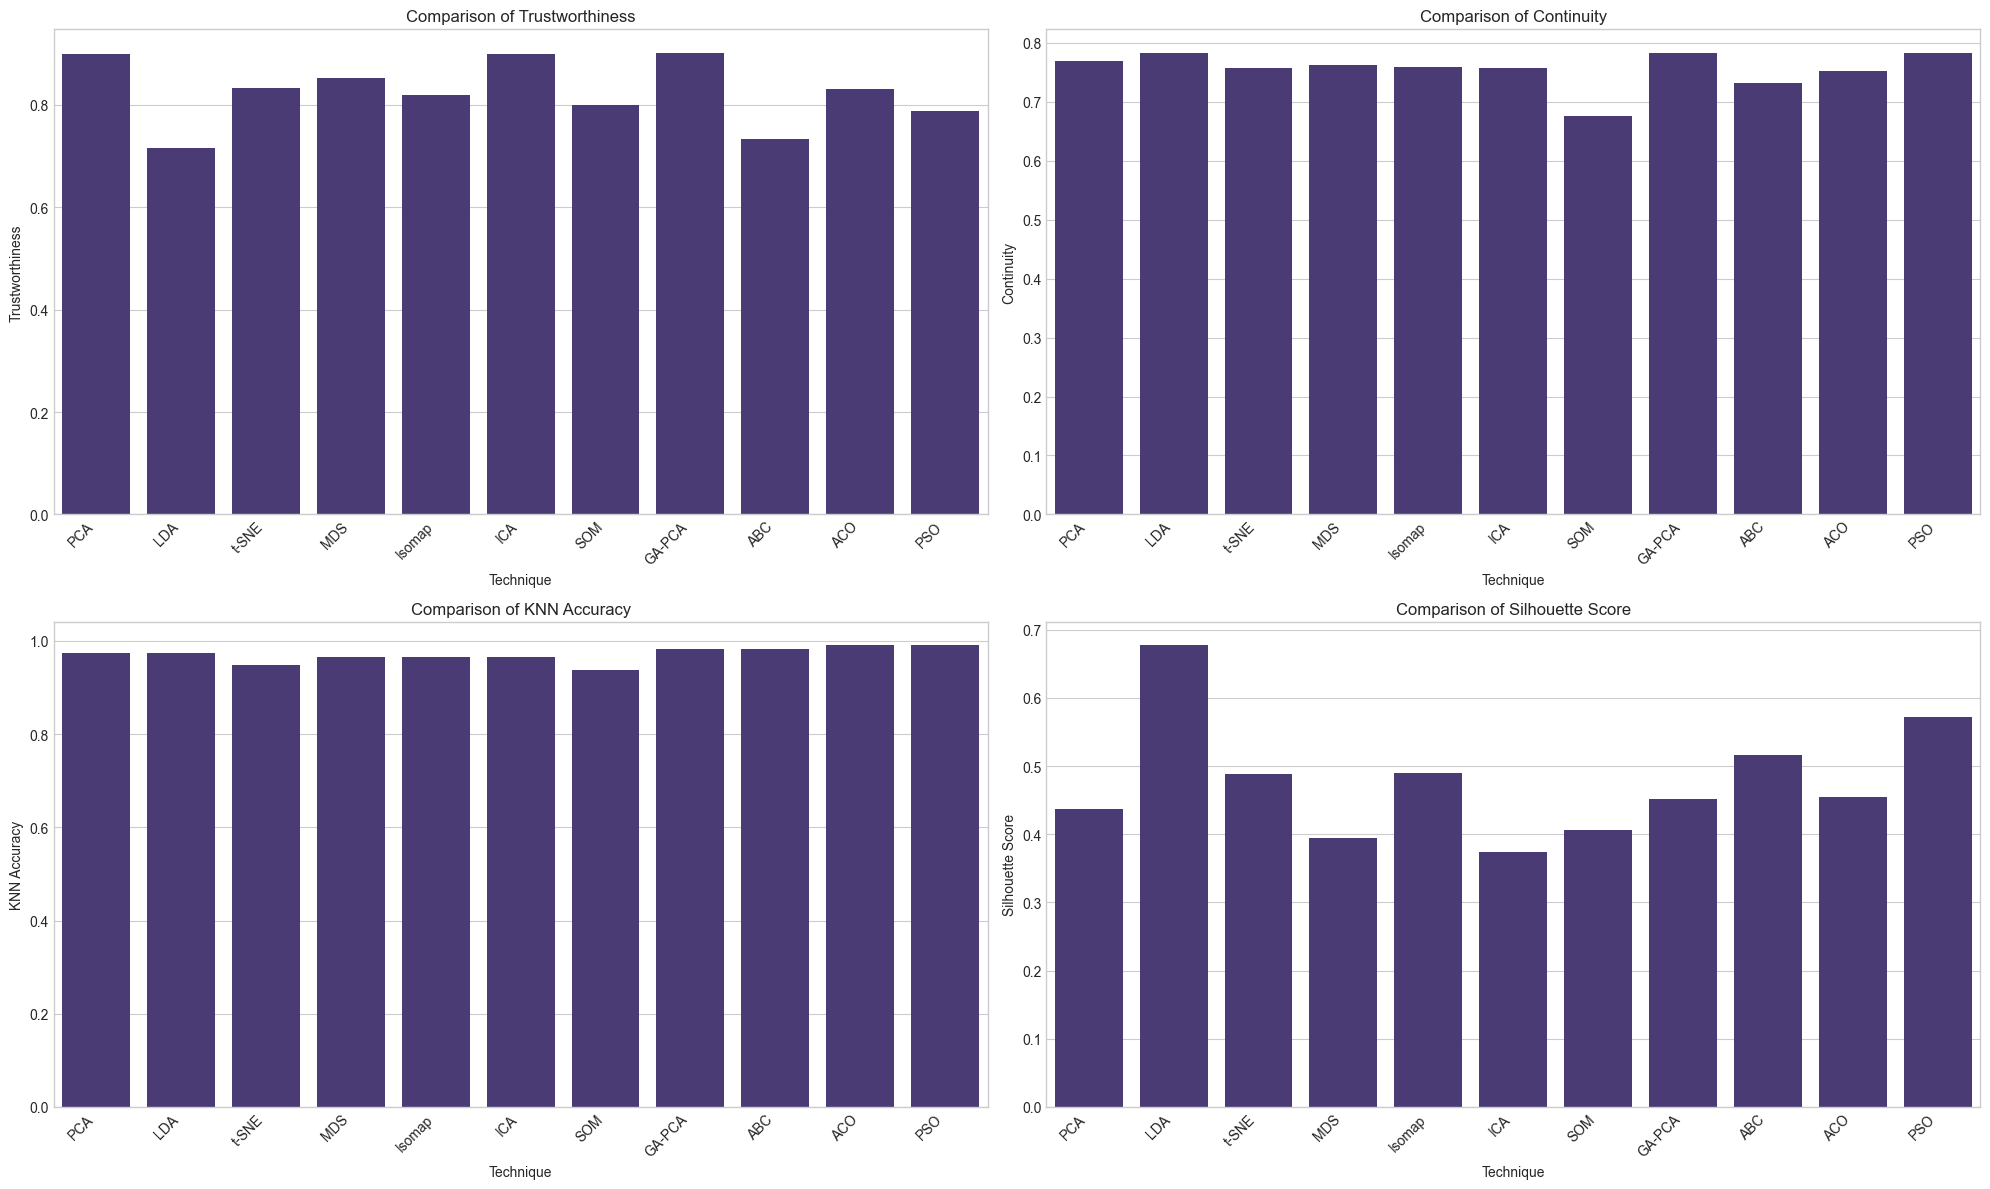

In [17]:
# Create bar plots for comparing metrics
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
metrics_to_plot = ['Trustworthiness', 'Continuity', 'KNN Accuracy', 'Silhouette Score']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    sns.barplot(x='Technique', y=metric, data=results_df, ax=ax)
    ax.set_title(f'Comparison of {metric}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()